<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/993465.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

#Carga de informacion

In [202]:
#se carga el excel con los datos de venta por dia por talla
df_vta=pd.read_excel('993465.xlsx',
                 sheet_name='Sheet1', 
                 parse_dates=['fecha'],
                 index_col = None, skiprows= 33, nrows= 439, 
                 usecols=range(0,6),
                 engine="openpyxl")
df_vta.info(memory_usage='deep')

#se carga el excel con los datos de existencia por dia por talla
df_exi=pd.read_excel('993465.xlsx',
                 sheet_name='Sheet1', 
                 parse_dates=['Efecha'],
                 index_col = None, skiprows= 477, nrows= 439, 
                 usecols=range(0,6),
                 engine="openpyxl")
df_exi.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   439 non-null    datetime64[ns]
 1   Ta23    439 non-null    int64         
 2   Ta24    439 non-null    int64         
 3   Ta25    439 non-null    int64         
 4   Ta26    439 non-null    int64         
 5   Ta27    439 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 20.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Efecha  439 non-null    datetime64[ns]
 1   ETa23   439 non-null    int64         
 2   ETa24   438 non-null    float64       
 3   ETa25   421 non-null    float64       
 4   ETa26   404 non-null    float64       
 5   ETa27   334 non-null    float64       
dtypes: datetime64[ns](1), flo

#Caracteristicas de informacion

##cuenta las tallas

In [203]:
r,tallas=df_vta.shape
tallas-=1
print('Tallas ',tallas)
colsexi=df_exi.columns[1:tallas+1]
colsvta=df_vta.columns[1:tallas+1]

Tallas  5


##columnas con nulos

In [204]:
 print('Columnas con nulos ',df_vta.columns[df_vta.isna().any()].tolist())

Columnas con nulos  []


##Ventas negativas por talla

In [205]:
print(bcolors.OKGREEN+bcolors.BOLD+'Ventas negativas por talla'+ bcolors.ENDC)
for col in colsvta:
  print(col,df_vta[df_vta[col]<0].shape[0])

Ventas negativas por talla
Ta23 13
Ta24 18
Ta25 7
Ta26 4
Ta27 2


##Ventas nulas por talla

In [206]:
print(bcolors.OKGREEN+bcolors.BOLD+'Ventas nulas por talla'+ bcolors.ENDC)
for col in colsvta:
  print(col,df_vta[col].isna().sum())

Ventas nulas por talla
Ta23 0
Ta24 0
Ta25 0
Ta26 0
Ta27 0


##Estadisticos de ventas

In [207]:
df_vta.describe().T

,count,mean,std,min,25%,50%,75%,max
Ta23,439.0,0.405467,0.721216,-2.0,0.0,0.0,1.0,4.0
Ta24,439.0,0.410023,0.749727,-1.0,0.0,0.0,1.0,3.0
Ta25,439.0,0.211845,0.504089,-1.0,0.0,0.0,0.0,2.0
Ta26,439.0,0.063781,0.287542,-1.0,0.0,0.0,0.0,2.0
Ta27,439.0,0.027335,0.189158,-1.0,0.0,0.0,0.0,1.0


##Existencias negativas por talla

In [208]:
print(bcolors.OKGREEN+bcolors.BOLD+'Existencias negativas por talla'+ bcolors.ENDC)
for col in colsexi:
  print(col,df_exi[df_exi[col]<0].shape[0])

Existencias negativas por talla
ETa23 0
ETa24 0
ETa25 3
ETa26 0
ETa27 0


##Existencias nulas por talla

In [209]:
print(bcolors.OKGREEN+bcolors.BOLD+'Existencias nulas por talla'+ bcolors.ENDC)
for col in colsexi:
  print(col,df_exi[col].isna().sum())

Existencias nulas por talla
ETa23 0
ETa24 1
ETa25 18
ETa26 35
ETa27 105


##Estadisticos de existencias

In [210]:
df_exi.describe().T

,count,mean,std,min,25%,50%,75%,max
ETa23,439.0,20.150342,15.394069,1.0,11.0,16.0,23.0,71.0
ETa24,438.0,29.431507,22.684960,1.0,15.0,21.5,32.0,104.0
ETa25,421.0,30.752969,16.684774,-1.0,20.0,25.0,41.0,69.0
ETa26,404.0,7.542079,7.180806,1.0,2.0,5.0,10.0,27.0
ETa27,334.0,2.616766,2.058416,1.0,1.0,2.0,3.0,9.0


#Concatenar ventas y existencias

In [211]:
df= pd.concat([df_vta, df_exi], axis=1)
df

,fecha,Ta23,Ta24,Ta25,Ta26,Ta27,Efecha,ETa23,ETa24,ETa25,ETa26,ETa27
0,2021-07-17,0,0,0,0,0,2021-07-17,24,32.0,24.0,8.0,3.0
1,2021-07-18,0,1,0,0,0,2021-07-18,24,31.0,24.0,8.0,3.0
2,2021-07-19,0,0,0,0,0,2021-07-19,24,31.0,24.0,8.0,3.0
3,2021-07-20,1,0,0,0,0,2021-07-20,23,31.0,24.0,8.0,3.0
4,2021-07-21,0,0,0,0,0,2021-07-21,23,31.0,24.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
434,2022-09-24,0,1,0,0,0,2022-09-24,16,14.0,16.0,2.0,2.0
435,2022-09-25,0,0,0,0,0,2022-09-25,16,14.0,16.0,2.0,2.0
436,2022-09-26,0,0,0,0,0,2022-09-26,16,14.0,16.0,2.0,2.0
437,2022-09-27,0,0,0,0,0,2022-09-27,16,14.0,16.0,2.0,2.0


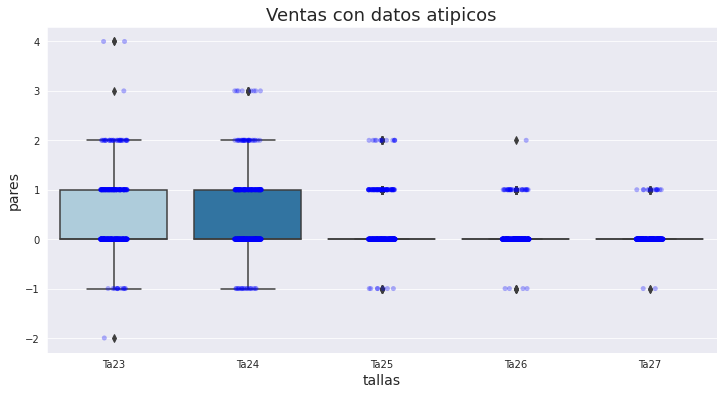

In [212]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data=df[colsvta],
            palette="Paired",
            showmeans=False, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

sns.stripplot(color = 'blue',
              alpha = 0.3,
              data = df[colsvta])

plt.ylabel("pares", size=14)
plt.xlabel("tallas", size=14)
plt.title("Ventas con datos atipicos", size=18)
plt.show()
#plt.savefig("boxplot.png")

##Las ventas negativas se ponen a cero

In [213]:
print(bcolors.OKGREEN+bcolors.BOLD+'Ventas negativas por talla antes de la limpieza'+ bcolors.ENDC)
for col in df[colsvta]:
  print(col,df[df[col]<0].shape[0])
  
#las ventas negativas se ponen a 0
for col in df[colsvta]:
  df[col]=df.apply(lambda x: 0 if x[col] < 0 else x[col],axis=1)

print(bcolors.OKGREEN+bcolors.BOLD+'Ventas negativas por talla despues de la limpieza'+ bcolors.ENDC)
for col in df[colsvta]:
  print(col,df[df[col]<0].shape[0])

print(bcolors.OKGREEN+bcolors.BOLD+'Ventas nulas por talla se ponen a 0'+ bcolors.ENDC)
for col in colsvta:
  print(col,'con nulos',df[col].isna().sum())
  df[col].replace(np.nan,0,inplace=True)
  print(col,'sin nulos',df[col].isna().sum())

Ventas negativas por talla antes de la limpieza
Ta23 13
Ta24 18
Ta25 7
Ta26 4
Ta27 2
Ventas negativas por talla despues de la limpieza
Ta23 0
Ta24 0
Ta25 0
Ta26 0
Ta27 0
Ventas nulas por talla se ponen a 0
Ta23 con nulos 0
Ta23 sin nulos 0
Ta24 con nulos 0
Ta24 sin nulos 0
Ta25 con nulos 0
Ta25 sin nulos 0
Ta26 con nulos 0
Ta26 sin nulos 0
Ta27 con nulos 0
Ta27 sin nulos 0


##Las existencias nulas se ponen a cero para identificar negados

In [214]:
print(bcolors.OKGREEN+bcolors.BOLD+'Existencias nulas por talla se ponen a 0'+ bcolors.ENDC)
for col in colsexi:
  print(col,'con nulos',df[col].isna().sum())
  df[col].replace(np.nan,0,inplace=True)
  print(col,'sin nulos',df[col].isna().sum())

Existencias nulas por talla se ponen a 0
ETa23 con nulos 0
ETa23 sin nulos 0
ETa24 con nulos 1
ETa24 sin nulos 0
ETa25 con nulos 18
ETa25 sin nulos 0
ETa26 con nulos 35
ETa26 sin nulos 0
ETa27 con nulos 105
ETa27 sin nulos 0


##Se normaliza la venta ajustando los datos atipicos
Se identifican los datos atipicos de venta y se ponen a una venta mas probable.
El proceso se hace por cada talla tomando las ventas donde se tiene existencia

In [215]:
df_vtaconexis=df[df['ETa27']>0]
df_freq=df_vtaconexis['Ta27'].value_counts()
df_freq.sort_values(ascending=False,inplace=True)
df_freq

0    324
1     10
Name: Ta27, dtype: int64

In [ ]:
for vcol,ecol in zip(df[colsvta],df[colsexi]):
  df_vtaconexis=df[df[ecol]>0]
  q   = np.percentile(df_vtaconexis[vcol], [25, 50, 75]) #calcular cuartiles Q1, Q2, Q3
  mediana = q[1] # la mediana es el segundo cuartil Q2
  riq = q[2] - q[1]    #calcula rango inter-cuartilico Q3 - Q1
  ba  = q[2] + 1.5*riq #bigote alto Q3 + 1.5 RIQ
  bb  = q[0] - 1.5*riq #bigote bajo Q1 - 1.5 RIQ
  print(vcol,'\t[',bb,']\t[',q[0],'\t',q[1],'\t',q[2],']\t[',ba,'] mediana ',mediana)
  ajuste = mediana if mediana > 0 else q[2] if q[2]>0 else 1

  print('ventas atipicas',df[df[vcol]>ba][vcol],'\tAjuste ',ajuste) #ventas outliers
  df.loc[df[vcol]>ba, vcol] = ajuste #hace el ajuste de los outliers
  print('despues de ajustar',df[df[vcol]>ba][vcol]) #valida que no hay outliers

  print('='*100)

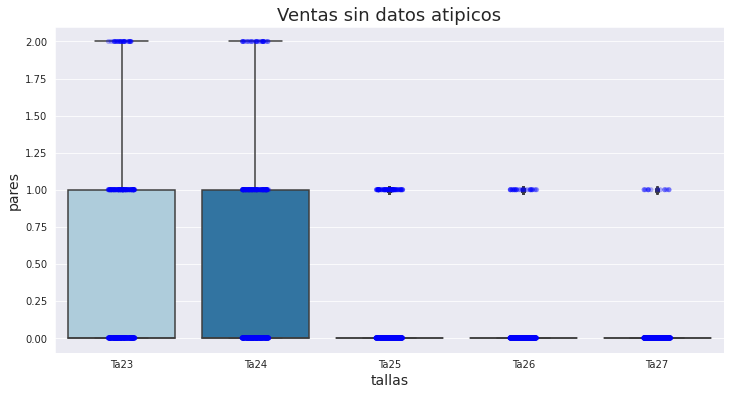

In [217]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data=df[colsvta],
            palette="Paired",
            showmeans=False, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

sns.stripplot(color = 'blue',
              alpha = 0.3,
              data = df[colsvta])

plt.ylabel("pares", size=14)
plt.xlabel("tallas", size=14)
plt.title("Ventas sin datos atipicos", size=18)
plt.show()

#Se hace la reconstruccion de venta para dias negados

##se identifican los dias negados

In [218]:
#Se cuentan los negados
for col in df[colsexi]:
    print(col,len(df[df[col]<=0]))

ETa23 0
ETa24 1
ETa25 21
ETa26 35
ETa27 105


##los negados se ponen a null para ser estimados

In [ ]:
for vcol,ecol in zip(df[colsvta],df[colsexi]):
  df[vcol]=df.apply(lambda x: np.NAN if x[ecol] <= 0 else x[vcol],axis=1)

df.style.set_caption("Ventas").set_precision(0).background_gradient().highlight_max(color='red')

In [221]:
#se obtiene el dia de la semana
df['dia_semana'] = df['fecha'].dt.day_name()
df.head()

,fecha,Ta23,Ta24,Ta25,Ta26,Ta27,Efecha,ETa23,ETa24,ETa25,ETa26,ETa27,dia_semana
0,2021-07-17,0,0.0,0.0,0.0,0.0,2021-07-17,24,32.0,24.0,8.0,3.0,Saturday
1,2021-07-18,0,1.0,0.0,0.0,0.0,2021-07-18,24,31.0,24.0,8.0,3.0,Sunday
2,2021-07-19,0,0.0,0.0,0.0,0.0,2021-07-19,24,31.0,24.0,8.0,3.0,Monday
3,2021-07-20,1,0.0,0.0,0.0,0.0,2021-07-20,23,31.0,24.0,8.0,3.0,Tuesday
4,2021-07-21,0,0.0,0.0,0.0,0.0,2021-07-21,23,31.0,24.0,8.0,3.0,Wednesday


In [222]:
#se odenan por dia se la semana para ser interpolados
df.sort_values(by=['dia_semana','fecha'],inplace=True)
df

,fecha,Ta23,Ta24,Ta25,Ta26,Ta27,Efecha,ETa23,ETa24,ETa25,ETa26,ETa27,dia_semana
6,2021-07-23,1,0.0,0.0,0.0,0.0,2021-07-23,21,31.0,24.0,8.0,3.0,Friday
13,2021-07-30,1,2.0,0.0,0.0,0.0,2021-07-30,16,27.0,22.0,7.0,3.0,Friday
20,2021-08-06,0,0.0,0.0,0.0,0.0,2021-08-06,13,21.0,23.0,7.0,3.0,Friday
27,2021-08-13,0,0.0,0.0,0.0,0.0,2021-08-13,9,19.0,20.0,6.0,3.0,Friday
34,2021-08-20,0,0.0,1.0,0.0,0.0,2021-08-20,6,17.0,16.0,5.0,3.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,2022-08-31,1,1.0,0.0,0.0,0.0,2022-08-31,24,19.0,18.0,1.0,2.0,Wednesday
417,2022-09-07,1,0.0,0.0,0.0,0.0,2022-09-07,23,19.0,18.0,1.0,2.0,Wednesday
424,2022-09-14,0,0.0,0.0,0.0,0.0,2022-09-14,21,16.0,17.0,2.0,2.0,Wednesday
431,2022-09-21,0,0.0,0.0,0.0,0.0,2022-09-21,18,15.0,17.0,2.0,2.0,Wednesday


##Se aplica la interpolacion para estimar la venta reconstruida

In [223]:
df.interpolate(method='ffill', limit_direction='forward',inplace=True)
df.interpolate(method='bfill', limit_direction='backward',inplace=True)
df

,fecha,Ta23,Ta24,Ta25,Ta26,Ta27,Efecha,ETa23,ETa24,ETa25,ETa26,ETa27,dia_semana
6,2021-07-23,1,0.0,0.0,0.0,0.0,2021-07-23,21,31.0,24.0,8.0,3.0,Friday
13,2021-07-30,1,2.0,0.0,0.0,0.0,2021-07-30,16,27.0,22.0,7.0,3.0,Friday
20,2021-08-06,0,0.0,0.0,0.0,0.0,2021-08-06,13,21.0,23.0,7.0,3.0,Friday
27,2021-08-13,0,0.0,0.0,0.0,0.0,2021-08-13,9,19.0,20.0,6.0,3.0,Friday
34,2021-08-20,0,0.0,1.0,0.0,0.0,2021-08-20,6,17.0,16.0,5.0,3.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,2022-08-31,1,1.0,0.0,0.0,0.0,2022-08-31,24,19.0,18.0,1.0,2.0,Wednesday
417,2022-09-07,1,0.0,0.0,0.0,0.0,2022-09-07,23,19.0,18.0,1.0,2.0,Wednesday
424,2022-09-14,0,0.0,0.0,0.0,0.0,2022-09-14,21,16.0,17.0,2.0,2.0,Wednesday
431,2022-09-21,0,0.0,0.0,0.0,0.0,2022-09-21,18,15.0,17.0,2.0,2.0,Wednesday


In [224]:
df.sort_values(by=['fecha'],inplace=True)
df

,fecha,Ta23,Ta24,Ta25,Ta26,Ta27,Efecha,ETa23,ETa24,ETa25,ETa26,ETa27,dia_semana
0,2021-07-17,0,0.0,0.0,0.0,0.0,2021-07-17,24,32.0,24.0,8.0,3.0,Saturday
1,2021-07-18,0,1.0,0.0,0.0,0.0,2021-07-18,24,31.0,24.0,8.0,3.0,Sunday
2,2021-07-19,0,0.0,0.0,0.0,0.0,2021-07-19,24,31.0,24.0,8.0,3.0,Monday
3,2021-07-20,1,0.0,0.0,0.0,0.0,2021-07-20,23,31.0,24.0,8.0,3.0,Tuesday
4,2021-07-21,0,0.0,0.0,0.0,0.0,2021-07-21,23,31.0,24.0,8.0,3.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2022-09-24,0,1.0,0.0,0.0,0.0,2022-09-24,16,14.0,16.0,2.0,2.0,Saturday
435,2022-09-25,0,0.0,0.0,0.0,0.0,2022-09-25,16,14.0,16.0,2.0,2.0,Sunday
436,2022-09-26,0,0.0,0.0,0.0,0.0,2022-09-26,16,14.0,16.0,2.0,2.0,Monday
437,2022-09-27,0,0.0,0.0,0.0,0.0,2022-09-27,16,14.0,16.0,2.0,2.0,Tuesday


In [226]:
!pip install xlwt
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
import openpyxl

#Se exporta la venta reconstruida

In [232]:
# Convert the dataframe to an XlsxWriter Excel object.
columnas = list(df[colsvta].values)

df[colsvta].to_excel("vtaOK.xlsx", 
            index=False,engine='openpyxl')


##Graficas

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


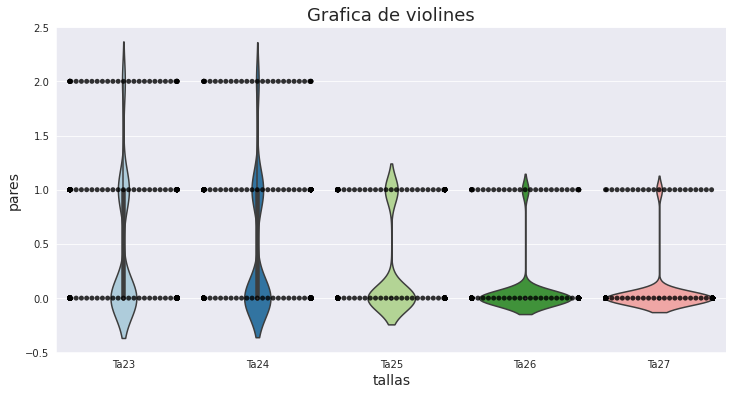

In [238]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.violinplot(data=df[colsvta],
            palette="Paired",
            bw_method="silverman",
            showmeans=True, 
            showmedians=True,
            showextrema=True);
sns.swarmplot(data=df[colsvta], color="k", alpha=0.8);

plt.ylabel("pares", size=14)
plt.xlabel("tallas", size=14)
plt.title("Grafica de violines", size=18)
plt.show()

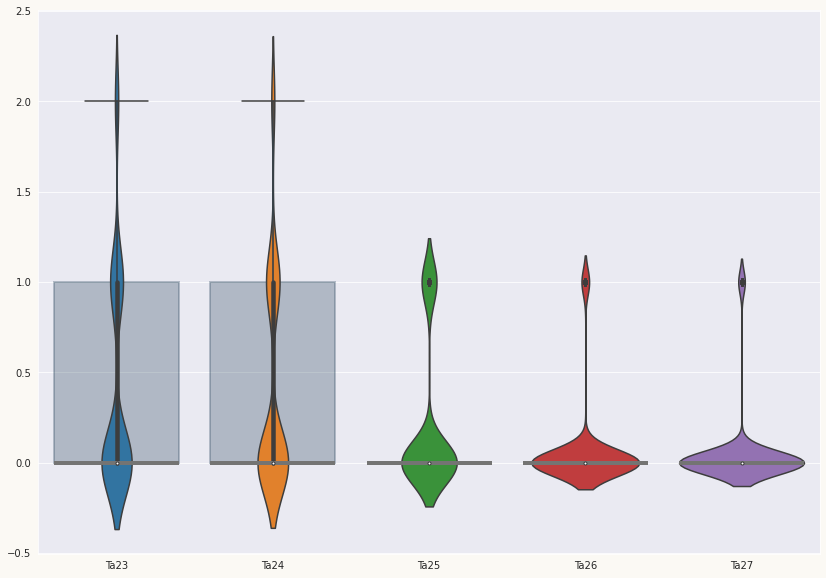

In [239]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"
# Background color
fig.patch.set_facecolor(BG_WHITE)
#ax.set_facecolor(BG_WHITE)
sns.set_style("darkgrid")

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)


# The output is stored in 'violins', used to customize their appearence
violins = sns.violinplot(
    data=df[colsvta], 
    bw_method="silverman",
    showmeans=False, 
    showmedians=False
) 
    
# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2,alpha=0.3,
    color=BLUE
)

sns.boxplot(
    data=df[colsvta],
    showfliers = True, # show the outliers beyond the caps.
    showcaps = True,   # show the caps
    #notch = True,
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
#for x, y in zip(x_jittered, y_data):
#    ax.scatter(x, y, s = 100, color=color, alpha=0.4)

In [233]:
venta_tallas = df[colsvta].sum()
curva=venta_tallas/venta_tallas.sum()
df_curva_ajustada=pd.DataFrame({'Ajustada':curva})

venta_tallas = df_vta[colsvta].sum()
curva=venta_tallas/venta_tallas.sum()
df_curva_venta=pd.DataFrame({'Venta':curva})


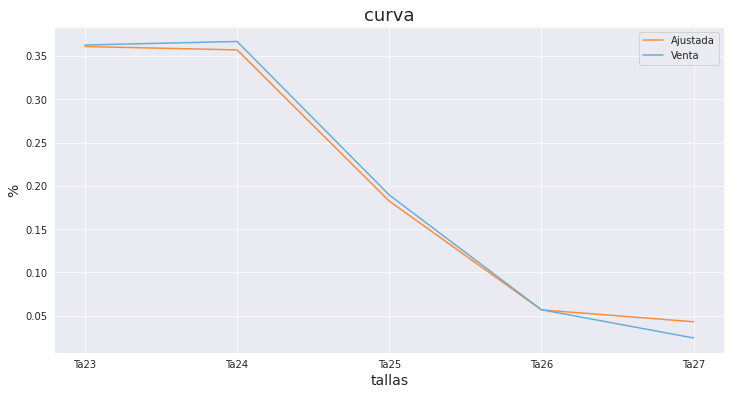

In [234]:
plt.figure(figsize=(12,6))

sns.set_style("darkgrid")
a=sns.lineplot(data=df_curva_ajustada,palette='Oranges')
b=sns.lineplot(data=df_curva_venta,palette='Blues')

plt.ylabel("%", size=14)
plt.xlabel("tallas", size=14)
plt.title("curva", size=18)
plt.show()

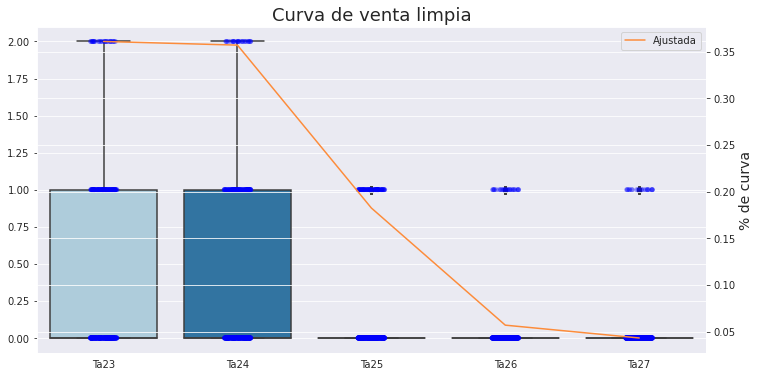

In [237]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data=df[colsvta],
            palette="Paired",
            showmeans=False, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

sns.stripplot(color = 'blue',
              alpha = 0.3,
              data = df[colsvta])

ax2 = plt.twinx()
sns.lineplot(data=df_curva_ajustada,palette='Oranges')

plt.ylabel("% de curva", size=14)
plt.xlabel("tallas", size=14)
plt.title("Curva de venta limpia", size=18)
plt.savefig("boxplot.png")
